Chapter 05

# 岭回归
Book_7《机器学习》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import yfinance as yf

In [2]:
p = plt.rcParams
p["font.sans-serif"] = ["Roboto"]
p["font.weight"] = "light"
p["ytick.minor.visible"] = True
p["xtick.minor.visible"] = True
p["axes.grid"] = True
p["grid.color"] = "0.5"
p["grid.linewidth"] = 0.5

In [4]:
# initializations
import pandas as pd
import pandas_datareader as web
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import yfinance as yf

In [5]:
tickers = ['^GSPC','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

stock_levels_df = yf.download(tickers, start='2020-07-01', end='2020-12-31')
stock_levels_df.to_csv('stock_levels_df.cvs')
stock_levels_df.to_pickle('stock_levels_df.pkl')

[*********************100%%**********************]  13 of 13 completed


In [6]:
y_X_df = stock_levels_df['Adj Close'].pct_change()
y_X_df.dropna(inplace = True)

y_X_df.rename(columns={"^GSPC": "SP500"},inplace = True)
X_df = y_X_df[tickers[1:]]
y_df = y_X_df[['SP500']]

In [7]:
labels = ['SP500','TSLA','WMT','MCD','USB',
           'YUM','NFLX','JPM','PFE',
           'F','GM','COST','JNJ'];

## OLS

In [8]:
import statsmodels.api as sm

# add a column of ones
X_df = sm.add_constant(X_df)

model = sm.OLS(y_df, X_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     32.24
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           5.73e-31
Time:                        19:15:36   Log-Likelihood:                 489.68
No. Observations:                 126   AIC:                            -953.4
Df Residuals:                     113   BIC:                            -916.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -0.974      0.3

In [9]:
b = model.fit().params
b = b.values

## Ridge regression

In [10]:
clf = Ridge()
coefs = []
errors = []
coeff_df = pd.DataFrame()

alphas = np.logspace(-4, 2, 200)

In [11]:
# Train the model with different regularisation strengths
for alpha_i in alphas:
    clf.set_params(alpha=alpha_i)
    clf.fit(X_df, y_df)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, 
                                     b.reshape(1,-1)))
    
    b_i = clf.coef_
    b_X_df = pd.DataFrame(data=b_i[:,1:].T, 
                          index = tickers[1:], 
                          columns=[alpha_i])
    
    coeff_df = pd.concat([coeff_df, b_X_df], axis = 1)

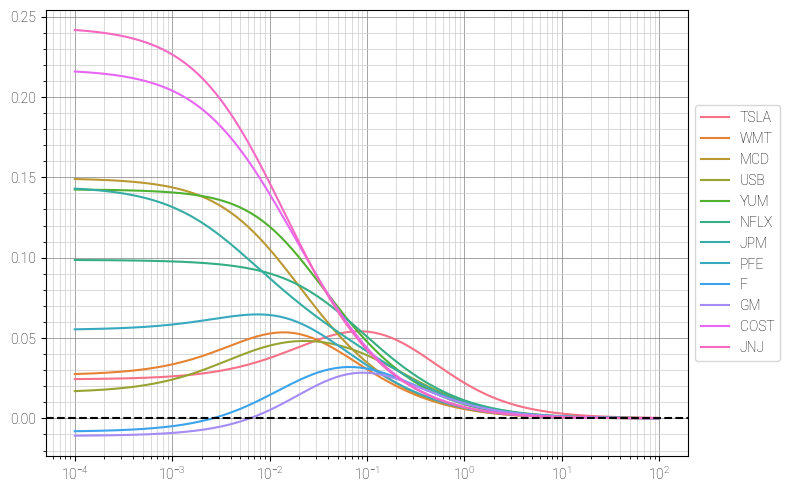

In [12]:
fig, ax = plt.subplots(figsize = (8,5))
h = sns.lineplot(data=coeff_df.T,markers=False, dashes=False,palette = "husl")
plt.axhline(y=0, color='k', linestyle='--')
h.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
ax.set_xscale('log')
plt.grid(b=True, which='minor', color='0.8')
# ax.grid(which='minor', axis='x', linestyle='--')

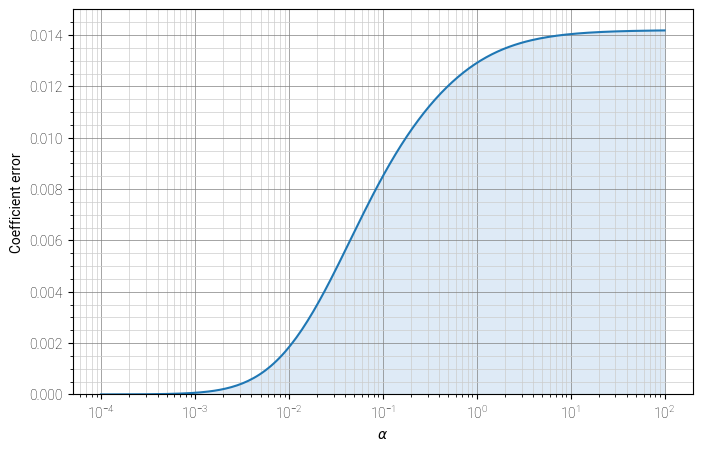

In [13]:
fig, ax = plt.subplots(figsize = (8,5))

ax.plot(alphas, errors)
plt.fill_between(alphas,errors, color = '#DEEAF6')
ax.set_xscale('log')
plt.xlabel('$\u03B1$')
plt.ylabel('Coefficient error')
plt.axis('tight')
plt.ylim(0,0.015)
plt.grid(b=True, which='minor', color='0.8')
plt.show()